# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Import the fetal YS NK

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/ys_total_annotation_20191127.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 10071 × 32084 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'cell.labels', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'LouvainClustering', 'predicted.cell.labels', 'full.ids', 'batch', 'bh_pval', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'n_counts', 'louvain', 'is_doublet', 'is_doublet_poptrim', 'res.30', 'backlabeled_1', 'cell.labels_progen'

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DC progenitor                78
Early mast cell             133
Endothelium                 160
Erythroid AB                892
Erythroid EZ               1167
Erythroid M                 275
ILC precursor                25
Lymphoid progenitor         184
MEMP                        121
Monocyte                     38
Myeloid progenitor           61
NK early                     50
yolk sac Macrophage I      3063
yolk sac Macrophage II     3619
yolk sac progenitor/MPP     205
dtype: int64

In [6]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [7]:
adata = adata[adata.obs['cell.labels'].isin(['NK early'])].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
NK early    50
dtype: int64

In [9]:
adata.obs["dataset"] = "ys"
adata.obs['cell.labels'] = adata.obs['cell.labels']

In [10]:
ys = adata

# Import the fetal liver NK

In [11]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [12]:
adata

AnnData object with n_obs × n_vars = 113063 × 27080 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'cell.labels', 'combined.labels', 'batch', 'sample', 'n_counts', 'cell.labels_progen'
    obsm: 'X_fdg', 'X_tsne', 'X_umap'

In [13]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [14]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [15]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [16]:
adata = adata[adata.obs['cell.labels'].isin(['NK'])].copy()

In [17]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
NK    6706
dtype: int64

In [18]:
adata.obs["dataset"] = "liver"
adata.obs['cell.labels'] = adata.obs['cell.labels']

In [19]:
liver = adata

# Import the FBM NK

In [20]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200718.h5ad')

In [21]:
adata

AnnData object with n_obs × n_vars = 104562 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'nk_meta'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [22]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8787
CD56 bright NK         450
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1493
tDC                    193
tip EC                 363
Length: 64, dtype: int64

In [23]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [24]:
adata = adata[adata.obs['cell.labels'].isin(['CD56 bright NK', 'mature NK'])].copy()

In [25]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD56 bright NK    450
mature NK         136
dtype: int64

In [26]:
adata.obs["dataset"] = "FBM"

In [27]:
fbm = adata

# Combine the datasets

In [28]:
from scipy import sparse

objects = [ys, liver, fbm]

for i in objects:
    array_vals = i.X
    i.X = sparse.csr_matrix(i.X)
    i.raw = i
    i.X = array_vals

In [29]:
merged = ys.concatenate(liver, fbm, index_unique=None, join='inner')

In [30]:
merged.shape

(7342, 27079)

In [31]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD56 bright NK     450
NK                6706
NK early            50
mature NK          136
dtype: int64

In [32]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [33]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
FBM_CD56 bright NK     450
FBM_mature NK          136
liver_NK              6706
ys_NK early             50
dtype: int64

# Pre-process the data

In [34]:
adata=merged

In [35]:
# normalise count data 
sc.pp.normalize_total(adata)

In [36]:
# log the count data 
sc.pp.log1p(adata)

In [37]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [38]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Import cytotoxicity genes

In [39]:
# load file in (cytotoxic genes from KEGG as of 21/07/2020)
# https://www.gsea-msigdb.org/gsea/msigdb/geneset_page.jsp?geneSetName=KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY&keywords=Natural%20killer%20cell%20mediated%20cytotoxicity%20KEGG
cytotoxicity_genes_file = '/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/cytotoxicity_genes.csv'
cytotoxicity_genes = pd.read_csv(cytotoxicity_genes_file, delimiter=',')
cytotoxicity_genes = cytotoxicity_genes["KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY"].tolist()

In [40]:
cytotoxicity_genes

['ARAF',
 'BID',
 'BRAF',
 'CASP3',
 'CD244',
 'CD247',
 'CD48',
 'CHP1',
 'CHP2',
 'CSF2',
 'FAS',
 'FASLG',
 'FCER1G',
 'FCGR3A',
 'FCGR3B',
 'FYN',
 'GRB2',
 'GZMB',
 'HCST',
 'HLA-A',
 'HLA-B',
 'HLA-C',
 'HLA-E',
 'HLA-G',
 'HRAS',
 'ICAM1',
 'ICAM2',
 'IFNA1',
 'IFNA10',
 'IFNA13',
 'IFNA14',
 'IFNA16',
 'IFNA17',
 'IFNA2',
 'IFNA21',
 'IFNA4',
 'IFNA5',
 'IFNA6',
 'IFNA7',
 'IFNA8',
 'IFNAR1',
 'IFNAR2',
 'IFNB1',
 'IFNG',
 'IFNGR1',
 'IFNGR2',
 'ITGAL',
 'ITGB2',
 'KIR2DL1',
 'KIR2DL2',
 'KIR2DL3',
 'KIR2DL4',
 'KIR2DL5A',
 'KIR2DS1',
 'KIR2DS3',
 'KIR2DS4',
 'KIR2DS5',
 'KIR3DL1',
 'KIR3DL2',
 'KLRC1',
 'KLRC2',
 'KLRC3',
 'KLRD1',
 'KLRK1',
 'KRAS',
 'LAT',
 'LCK',
 'LCP2',
 'MAP2K1',
 'MAP2K2',
 'MAPK1',
 'MAPK3',
 'MICA',
 'MICB',
 'NCR1',
 'NCR2',
 'NCR3',
 'NFAT5',
 'NFATC1',
 'NFATC2',
 'NFATC3',
 'NFATC4',
 'NRAS',
 'PAK1',
 'PIK3CA',
 'PIK3CB',
 'PIK3CD',
 'PIK3CG',
 'PIK3R1',
 'PIK3R2',
 'PIK3R3',
 'PIK3R5',
 'PLCG1',
 'PLCG2',
 'PPP3CA',
 'PPP3CB',
 'PPP3CC',
 'PPP3R

In [41]:
sc.tl.score_genes(adata, gene_list = cytotoxicity_genes, score_name="cytotoxicity_score")

# Reorder the celltype/tissue metadata col (in prep for heatmap)

In [42]:
# order tissue_cell.labels column

adata.obs["dataset_cell.labels"].unique()

array(['ys_NK early', 'liver_NK', 'FBM_mature NK', 'FBM_CD56 bright NK'],
      dtype=object)

In [43]:
# order tissue_cell.labels column

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].astype("category")

adata.obs["dataset_cell.labels"] = adata.obs["dataset_cell.labels"].cat.reorder_categories([
       'ys_NK early', 
       'liver_NK', 'FBM_CD56 bright NK', 'FBM_mature NK'])

In [44]:
adata.obs["dataset_cell.labels"].unique()

[ys_NK early, liver_NK, FBM_mature NK, FBM_CD56 bright NK]
Categories (4, object): [ys_NK early, liver_NK, FBM_mature NK, FBM_CD56 bright NK]

In [45]:
# save cell cycle scores within metadata as a dataframe (called enrichement scores)
adata.obs["labels"] = adata.obs["dataset_cell.labels"]
meta = pd.DataFrame(adata.obs)
enrichment_scores_df = meta[meta.columns[-2:]]
enrichment_scores_df

,cytotoxicity_score,labels
index,,
F32_yolk sac_Total_FCAImmP7316900_AAAGTAGGTCTGATTG,0.053162,ys_NK early
F32_yolk sac_Total_FCAImmP7316900_ATCGAGTTCACAATGC,0.010721,ys_NK early
F32_yolk sac_Total_FCAImmP7316900_CATGCCTAGAATGTTG,-0.029414,ys_NK early
F32_yolk sac_Total_FCAImmP7316900_CGTAGCGTCTTACCGC,0.108937,ys_NK early
F32_yolk sac_Total_FCAImmP7316900_GACGCGTTCCTAGTGA,0.271950,ys_NK early
...,...,...
ACGGTCGCATGTTTGG-1-WSSS_F_BON8710643,0.250948,FBM_CD56 bright NK
CTGCCTACACGGGTAA-1-WSSS_F_BON8710643,0.085070,FBM_CD56 bright NK
GTGCGTGAGCCTGGAA-1-WSSS_F_BON8710643,0.173172,FBM_CD56 bright NK


In [46]:
# calculate mean enrichment scores by celltype
mean_enrichment_scores_df = enrichment_scores_df.groupby('labels').mean()
mean_enrichment_scores_df = mean_enrichment_scores_df.T
mean_enrichment_scores_df = mean_enrichment_scores_df.sort_index()
mean_enrichment_scores_df

labels,ys_NK early,liver_NK,FBM_CD56 bright NK,FBM_mature NK
cytotoxicity_score,0.053826,0.107367,0.195169,0.36075


# Run heatmap

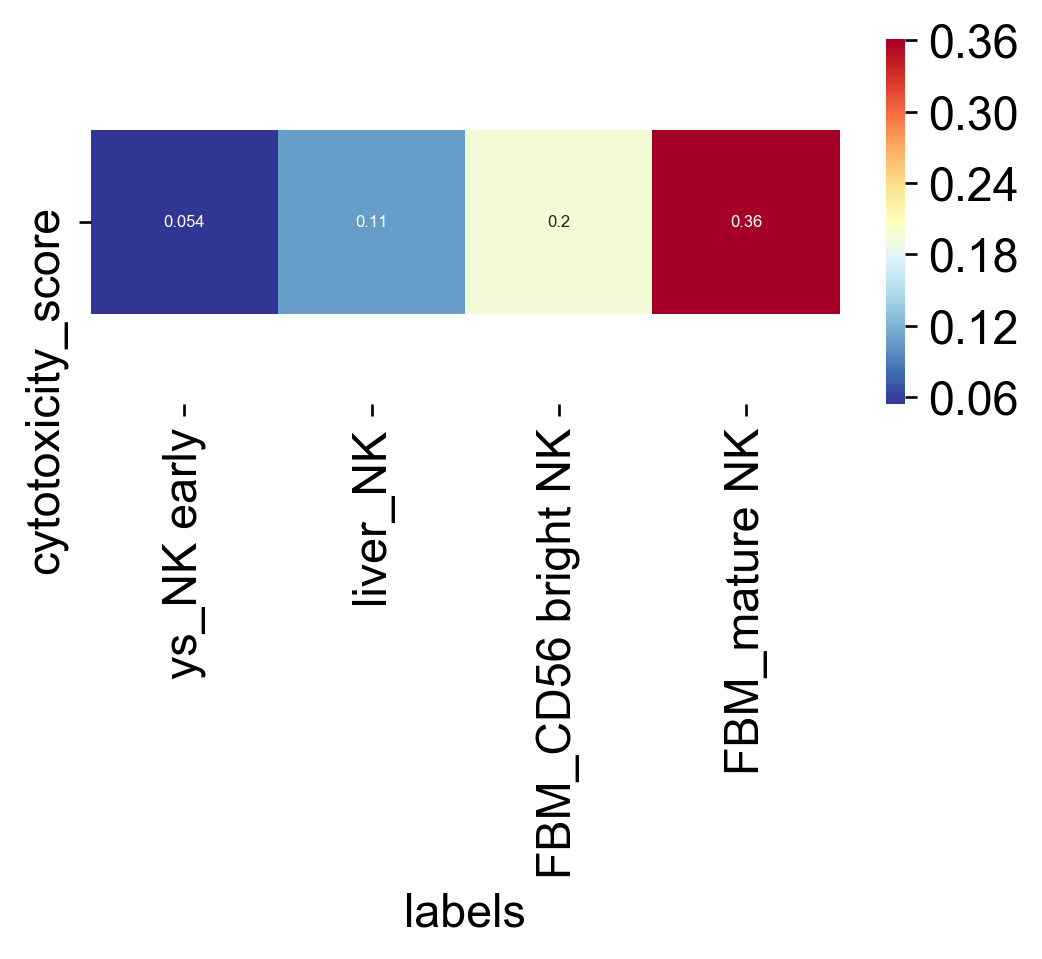

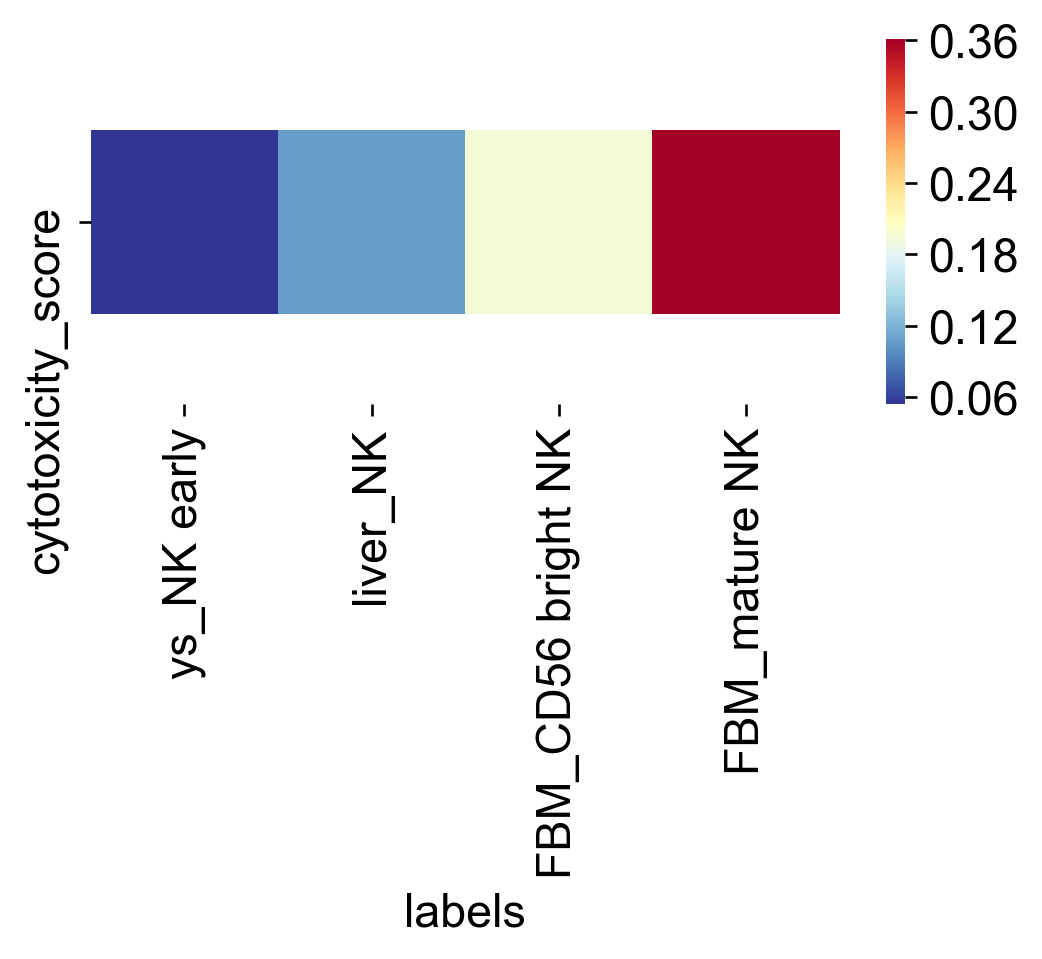

In [47]:
plt.figure(figsize=(5, 2))
fig = sns.heatmap(mean_enrichment_scores_df, annot=True, fmt=".2", annot_kws={"size": 5}, cmap="RdYlBu_r").get_figure() #xticklabels=cell_label_order, yticklabels=cell_label_order,
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/fig2g_nk_cyto_cross_tissue_comparison_numbers_yes_20200721b.pdf")

plt.figure(figsize=(5, 2))
fig = sns.heatmap(mean_enrichment_scores_df, cmap="RdYlBu_r").get_figure() 
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
fig.savefig("figures/fig2g_nk_cyto_cross_tissue_comparison_numbers_no_20200721b.pdf")

# Save the data

In [48]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [49]:
adata.X

<7342x27079 sparse matrix of type '<class 'numpy.float32'>'
	with 14323779 stored elements in Compressed Sparse Row format>

In [50]:
adata.raw.X

<7342x27079 sparse matrix of type '<class 'numpy.float32'>'
	with 15988483 stored elements in Compressed Sparse Row format>

In [51]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2g_nk_cyto_cross_tissue_20200721b.h5ad")

... storing 'AnnatomicalPart' as categorical
... storing 'april_cell.labels' as categorical
... storing 'backlabeled_1' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'cell.labels_progen' as categorical
... storing 'combined.labels' as categorical
... storing 'dataset' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'full.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'nk_meta' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sample' as categorical
... storing 'sample.type' as categorical
... storing 'sequencing.